# Benchmark ComBind

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../1_dock')
from shared_paths import shared_paths

sys.path.append('../3_analyze')
from containers import Dataset

In [3]:
# Available Proteins
prots = os.listdir('../../data')
prots.remove('M3') # Preprocessing failed, currently debugging
prots.remove('O60885')
prots.remove('P00749')
prots.remove('P03951')
prots.remove('P00760')
prots.remove('._.DS_Store')
prots.remove('.DS_Store')
prots

['GCR',
 'BRAF',
 'DTRANSP',
 'AR',
 'MEK1',
 '5HT2B',
 'CDK2',
 'SIGMA1',
 'JAK2',
 'ERA',
 'PLK1',
 'VITD',
 'GLUT1',
 'MGLUR5',
 'STRANSP',
 'B2AR',
 'TRPV1',
 'MR',
 'B1AR',
 'CHK1']

In [4]:
data = Dataset(shared_paths, prots)

In [35]:
# Count available scoring outputs
data_dir='/scratch/PI/rondror/jpaggi/combind/data'
scores = 'scores17'
for prot_name, protein in data.proteins.items():
    dir_name = "{}/{}/scores/{}".format(data_dir, prot_name, scores)
    num = 0
    if os.path.exists(dir_name):
        num = len([fname for fname in os.listdir(dir_name) if fname[-2:] == 'sc'])
    print prot_name, num

B2AR 8
GLUT1 3
5HT2B 2
PLK1 12
TRPV1 2
CDK2 19
CHK1 20
MGLUR5 5
MEK1 20
GCR 17
JAK2 20
BRAF 20
MR 13
DTRANSP 9
STRANSP 5
VITD 20
SIGMA1 2
B1AR 12
AR 10
ERA 19


In [36]:
# Get RMSDs for each protein, for each ligand
glide, combind = {}, {}
for prot in prots:
    glide[prot] = {}
    combind[prot] = {}
    path = "{}/{}/scores/{}/".format(data_dir, prot, scores)
    for fname in os.listdir(path):
        if fname[-2:] != 'sc': continue
        with open(path+fname) as fp:
            ranking = int(fp.readline().split(',')[1])
        ligname, struct = fname.split('.')[0].split('-to-')
        data.load({prot: [ligname]}, {prot: [struct]}, load_fp=False, load_mcss=False)
        poses = data.proteins[prot].docking[struct].ligands[ligname].poses
        if ranking >= len(poses):
            print ranking, len(poses)
            continue
        glide[prot][ligname]   = poses[0].rmsd
        combind[prot][ligname] = poses[ranking].rmsd

# Make sure that the dictionaries have an identical structure
assert all(k in combind for k in glide)
assert all(k in glide for k in combind)
for prot, ligs in combind.items():
    assert all(k in combind[prot] for k in glide[prot])
    assert all(k in glide[prot] for k in combind[prot])

Glide Average: 2.89729176185
ComBind Average: 2.69003880332


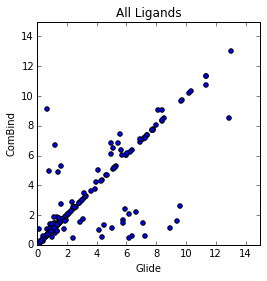

In [37]:
x, y = [], []
for prot, ligs in combind.items():
    for ligname in ligs:
        x += [glide[prot][ligname]]
        y += [combind[prot][ligname]]
f, ax = plt.subplots()
plt.scatter(x, y)
plt.xlabel('Glide')
plt.ylabel('ComBind')
plt.title('All Ligands')
plt.xlim(0, 15)
plt.ylim(0, 15)
ax.set_aspect('equal', 'box')
print 'Glide Average:', sum(x) / float(len(x))
print 'ComBind Average:', sum(y) / float(len(y))
# 2.69003880332

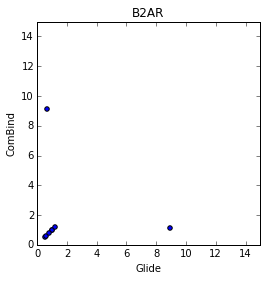

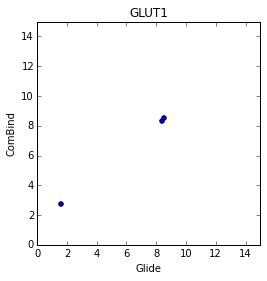

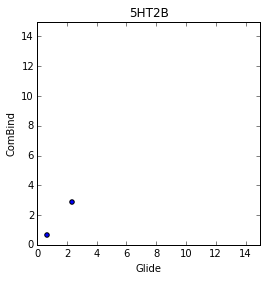

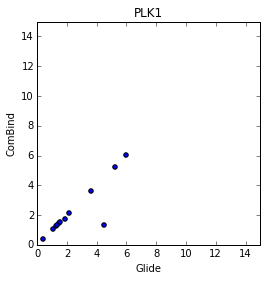

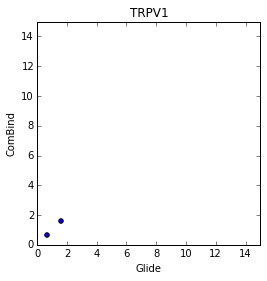

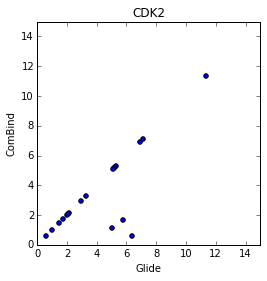

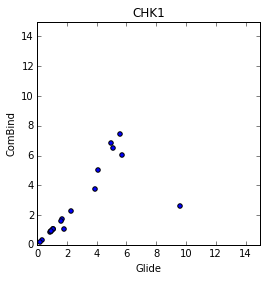

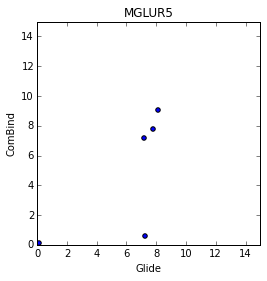

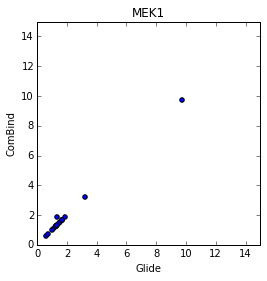

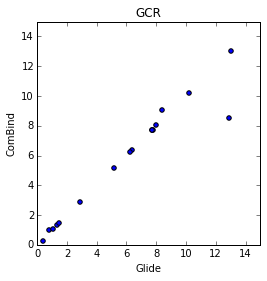

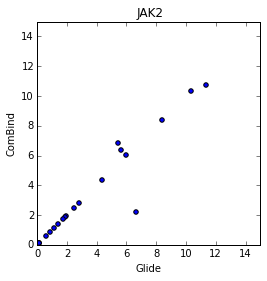

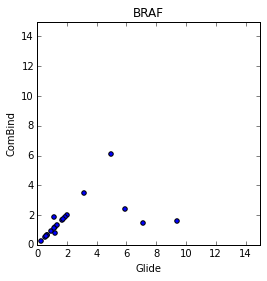

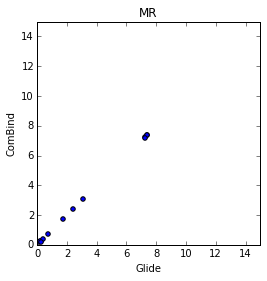

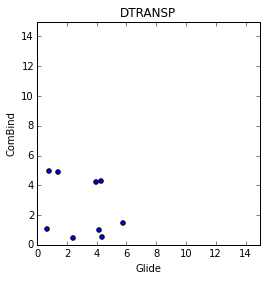

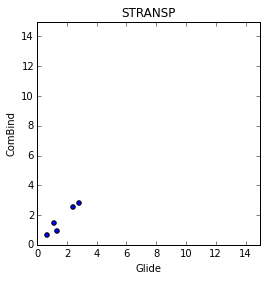

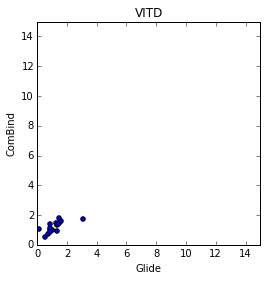

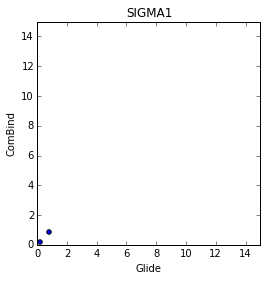

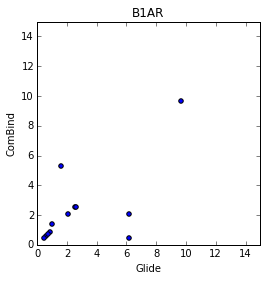

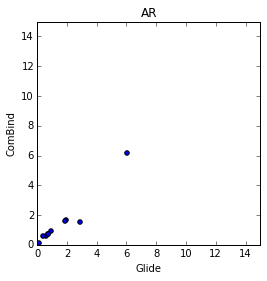

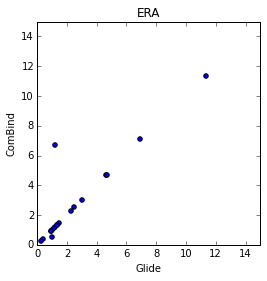

In [27]:
for prot, ligs in combind.items():
    x, y = [], []
    for ligname in ligs:
        x += [glide[prot][ligname]]
        y += [combind[prot][ligname]]
    f, ax = plt.subplots()
    plt.scatter(x, y)
    plt.xlabel('Glide')
    plt.ylabel('ComBind')
    plt.xlim(0, 15)
    plt.ylim(0, 15)
    ax.set_aspect('equal', 'box')
    plt.title(prot)
    plt.show()

2.81807516753 2.64593603949


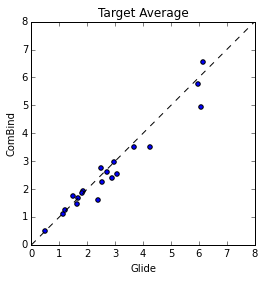

In [28]:
x, y = [], []
for prot, ligs in combind.items():
    _x, _y = [], []
    for ligname in ligs:
        _x += [glide[prot][ligname]]
        _y += [combind[prot][ligname]]
    x += [sum(_x)/float(len(_x))]
    y += [sum(_y)/float(len(_y))]
f, ax = plt.subplots()
plt.scatter(x, y)
plt.xlabel('Glide')
plt.ylabel('ComBind')
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.plot(range(9), linestyle='--', c = 'k')
plt.title('Target Average')
ax.set_aspect('equal', 'box')
print sum(x) / float(len(x)), sum(y) / float(len(y))
plt.show()

(array([ 3.,  1.,  7.,  3.,  1.,  1.,  1.,  2.,  0.,  1.]),
 array([-0.37464824, -0.22209453, -0.06954082,  0.08301289,  0.2355666 ,
         0.38812031,  0.54067402,  0.69322774,  0.84578145,  0.99833516,
         1.15088887]),
 <a list of 10 Patch objects>)

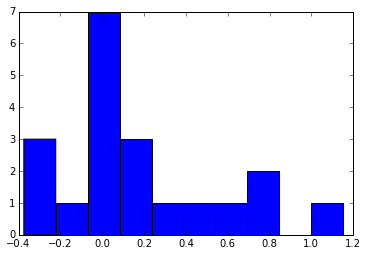

In [29]:
plt.hist(np.array(x) - np.array(y))

0.604984222434 0.63135849144


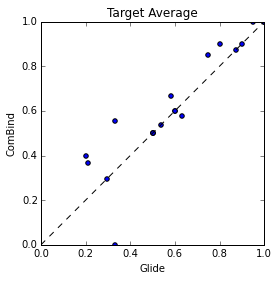

In [30]:
x, y = [], []
for prot, ligs in combind.items():
    _x, _y = [], []
    for ligname in ligs:
        _x += [glide[prot][ligname] < 2]
        _y += [combind[prot][ligname] < 2]
    x += [sum(_x)/float(len(_x))]
    y += [sum(_y)/float(len(_y))]
f, ax = plt.subplots()
plt.scatter(x, y)
plt.xlabel('Glide')
plt.ylabel('ComBind')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot(range(9), linestyle='--', c = 'k')
plt.title('Target Average')
ax.set_aspect('equal', 'box')
print sum(x) / float(len(x)), sum(y) / float(len(y))
plt.show()

(array([  2.,   1.,   3.,   1.,  12.,   0.,   0.,   0.,   0.,   1.]),
 array([ -2.22222222e-01,  -1.66666667e-01,  -1.11111111e-01,
         -5.55555556e-02,  -2.77555756e-17,   5.55555556e-02,
          1.11111111e-01,   1.66666667e-01,   2.22222222e-01,
          2.77777778e-01,   3.33333333e-01]),
 <a list of 10 Patch objects>)

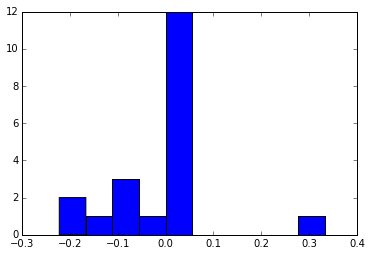

In [31]:
plt.hist(np.array(x) - np.array(y))